In [1]:
%pylab inline
import pandas as pd
import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
fname = "north_america_rbn_filtered.csv.bz2"

In [3]:
fname

'north_america_rbn_filtered.csv.bz2'

In [4]:
df_0 = pd.read_csv(fname,parse_dates=['datetime'])

In [5]:
df_0.keys()

Index(['datetime', 'frequency', 'band', 'mode', 'source', 'N_hops', 'R_gc',
       'R_gc_mean', 'azm', 'call_0', 'grid_0', 'lat_0', 'lon_0', 'grid_src_0',
       'srpt_0', 'call_1', 'grid_1', 'lat_1', 'lon_1', 'grid_src_1', 'srpt_1',
       'lat_mid', 'lon_mid', 'lat_mhop_0', 'lon_mhop_0', 'lat_mhop_1',
       'lon_mhop_1', 'lat_mhop_2', 'lon_mhop_2', 'lat_mhop_3', 'lon_mhop_3',
       'lat_mhop_4', 'lon_mhop_4', 'obs_0_300km', 'km2max_0_300km',
       'obs_1_300km', 'km2max_1_300km', 'obs_mid_300km', 'km2max_mid_300km',
       'obs_mhop_0_300km', 'km2max_mhop_0_300km', 'obs_mhop_1_300km',
       'km2max_mhop_1_300km', 'obs_mhop_2_300km', 'km2max_mhop_2_300km',
       'obs_mhop_3_300km', 'km2max_mhop_3_300km', 'obs_mhop_4_300km',
       'km2max_mhop_4_300km'],
      dtype='object')

In [6]:
keys=[]
keys.append('datetime')
keys.append('frequency')
keys.append('band')
keys.append('R_gc')
keys.append('azm')
keys.append('call_0')
keys.append('lat_0')
keys.append('lon_0')
keys.append('call_1')
keys.append('lat_1')
keys.append('lon_1')
keys.append('lat_mid')
keys.append('lon_mid')
keys.append('srpt_0')
#keys.append('obs_mid_300km')
df=df_0[keys].copy()

In [7]:
def ut_hr(dt):
    result = dt.hour + dt.minute/60. + dt.second/3600.
    return result
df.loc[:,'ut_hr'] = df.datetime.map(ut_hr)

In [8]:
len(df)

428683

In [9]:
df.describe()

,frequency,band,R_gc,azm,lat_0,lon_0,lat_1,lon_1,lat_mid,lon_mid,srpt_0,ut_hr
count,428683.000000,428683.000000,428683.000000,428683.000000,428683.000000,428683.000000,428683.000000,428683.000000,428683.000000,428683.000000,428683.000000,428683.000000
mean,12.056203,11.989591,1959.099946,1.376140,41.171759,-90.682466,38.013488,-90.427942,40.478315,-90.697571,20.212472,17.810745
std,3.721143,3.777180,1489.207397,101.284739,5.701054,24.697882,6.851288,19.813527,5.455222,16.656447,10.302037,2.193257
min,1.807400,1.000000,0.000000,-179.702184,-37.812500,-149.875000,-88.979200,-177.958300,-30.107328,-179.888856,0.000000,14.000000
25%,7.044000,7.000000,988.948045,-86.221617,37.479167,-111.958300,33.812500,-98.291700,37.530825,-100.276336,12.000000,15.975556
50%,14.030900,14.000000,1523.045263,-4.180814,41.062500,-88.041700,39.312500,-87.875000,40.191811,-89.432431,19.000000,17.642222
75%,14.042400,14.000000,2717.224213,89.832233,42.979200,-79.041667,42.312500,-79.708300,42.833911,-80.931928,27.000000,19.636667
max,50.101200,50.000000,16688.254233,180.000000,64.479200,151.208333,142.979200,285.958300,87.545152,179.375282,99.000000,21.999722


In [10]:
tf=df['R_gc']>16000

In [11]:
df[tf]

,datetime,frequency,band,R_gc,azm,call_0,lat_0,lon_0,call_1,lat_1,lon_1,lat_mid,lon_mid,srpt_0,ut_hr
5967,2017-08-21 14:11:20,28.2208,28.0,16688.254233,71.427167,VK3FFB,-37.8125,145.2917,W1EE,41.0625,-73.5417,4.867051,-147.912365,0.0,14.188889
72860,2017-08-21 15:25:14,28.1592,28.0,16167.393799,72.775421,VK3FFB,-37.8125,145.2917,K3EQ,39.6042,-79.4583,2.351151,-148.826881,1.0,15.420556
418763,2017-08-21 21:46:22,14.0454,14.0,16457.267507,-94.594573,W4KKN,38.7292,-77.6250,VK3CWB,-34.3125,142.1250,6.451368,-152.266597,17.0,21.772778


In [12]:
dft=df.copy()
tf=dft['call_0']=='WE9V'
dft=dft[tf]

tf=dft['call_1']=='AA2MF'
dft=dft[tf]


tf=dft['band']==14
dft=dft[tf]

In [13]:
dft

,datetime,frequency,band,R_gc,azm,call_0,lat_0,lon_0,call_1,lat_1,lon_1,lat_mid,lon_mid,srpt_0,ut_hr
609,2017-08-21 14:01:22,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,26.0,14.022778
616,2017-08-21 14:01:22,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,26.0,14.022778
684,2017-08-21 14:01:32,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,26.0,14.025556
686,2017-08-21 14:01:32,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,29.0,14.025556
693,2017-08-21 14:01:32,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,30.0,14.025556
818,2017-08-21 14:01:52,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,28.0,14.031111
819,2017-08-21 14:01:52,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,27.0,14.031111
936,2017-08-21 14:02:12,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,27.0,14.036667
939,2017-08-21 14:02:12,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,27.0,14.036667
1018,2017-08-21 14:02:22,14.085,14.0,1707.172717,162.201376,WE9V,42.5625,-88.0417,AA2MF,27.8125,-82.7917,35.215598,-85.176968,26.0,14.039444


In [14]:
xx=dft['datetime']
yy=dft['srpt_0']

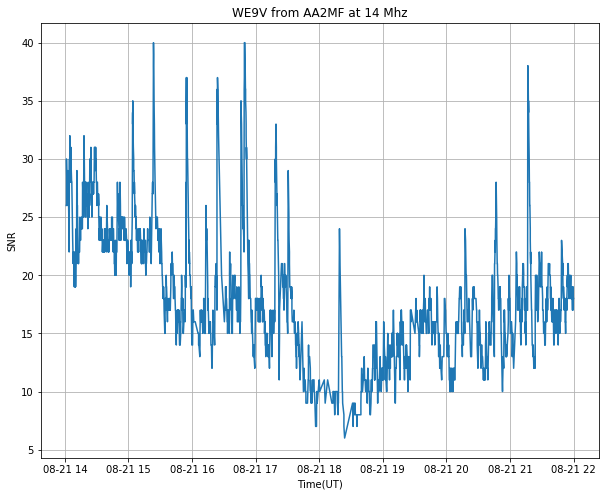

In [15]:
plt.figure(figsize=(10,8))
plt.plot(xx,yy)
plt.xlabel('Time(UT)')
plt.ylabel('SNR')
plt.title('WE9V from AA2MF at 14 Mhz')
plt.grid()
plt.show()

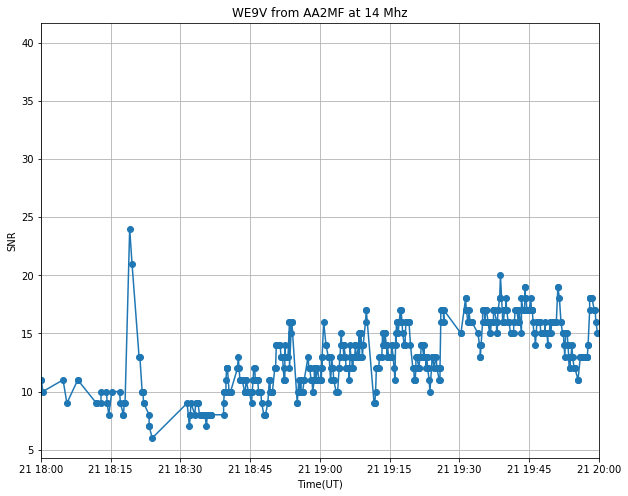

In [16]:
dt_0=datetime.datetime(2017,8,21,18)
dt_1=datetime.datetime(2017,8,21,20)
plt.figure(figsize=(10,8))
plt.plot(xx,yy,marker='o')
plt.xlim(dt_0,dt_1)
plt.xlabel('Time(UT)')
plt.ylabel('SNR')
plt.title('WE9V from AA2MF at 14 Mhz')
plt.grid()
plt.show()

In [17]:
dft_1 = dft.copy()
dt_0=datetime.datetime(2017,8,21,18,15)
dt_1=datetime.datetime(2017,8,21,18,25)

tf = np.logical_and(dft_1.datetime >= dt_0, dft_1.datetime < dt_1)
dft_1 = dft_1[tf]

dft_1 = dft_1[ ['datetime','ut_hr','srpt_0'] ]

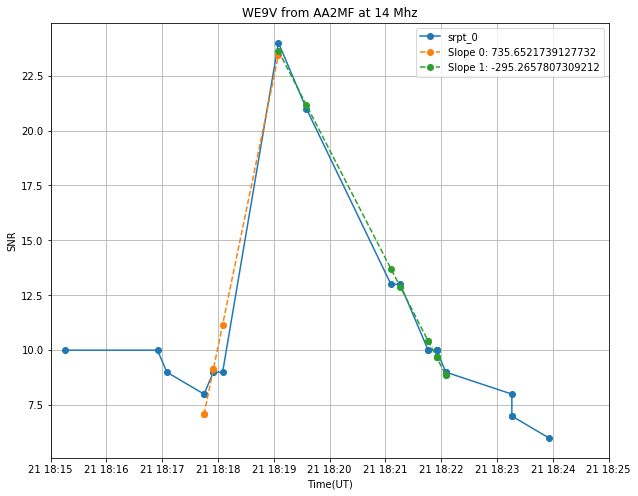

In [18]:
xx=dft_1['datetime']
yy=dft_1['srpt_0']
ut=dft_1['ut_hr']
    
fit_0_times = (datetime.datetime(2017,8,21,18,17,45),datetime.datetime(2017,8,21,18,19,10))
fit_0_tf    = np.logical_and(dft_1.datetime >= fit_0_times[0], dft_1.datetime < fit_0_times[1])
fit_0_df    = dft_1[fit_0_tf]
fit_0_coefs = np.polyfit(fit_0_df.ut_hr,fit_0_df.srpt_0,1)
fit_0_xx    = fit_0_df.ut_hr
fit_0_yy    = fit_0_coefs[0]*fit_0_df.ut_hr+fit_0_coefs[1]
fit_0_label = 'Slope 0: {!s}'.format(fit_0_coefs[0])

fit_1_times = (datetime.datetime(2017,8,21,18,19),datetime.datetime(2017,8,21,18,22,30))
fit_1_tf    = np.logical_and(dft_1.datetime >= fit_1_times[0], dft_1.datetime < fit_1_times[1])
fit_1_df    = dft_1[fit_1_tf]
fit_1_coefs = np.polyfit(fit_1_df.ut_hr,fit_1_df.srpt_0,1)
fit_1_xx    = fit_1_df.ut_hr
fit_1_yy    = fit_1_coefs[0]*fit_1_df.ut_hr+fit_1_coefs[1]
fit_1_label = 'Slope 1: {!s}'.format(fit_1_coefs[0])

plt.figure(figsize=(10,8))
plt.plot(xx,yy,marker='o')
plt.plot(fit_0_df.datetime,fit_0_yy,ls='--',marker='o',label=fit_0_label)
plt.plot(fit_1_df.datetime,fit_1_yy,ls='--',marker='o',label=fit_1_label)

#plt.xlim(ut_hr(dt_0),ut_hr(dt_1))
plt.xlim(dt_0,dt_1)

plt.xlabel('Time(UT)')
plt.ylabel('SNR')
plt.title('WE9V from AA2MF at 14 Mhz')
plt.legend(loc='upper right')
plt.grid()
plt.show()
